In [1]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn

In [2]:
%matplotlib inline

In [3]:
import zipfile
zipfile.ZipFile('names.zip').extractall('.')

In [4]:
import os
os.listdir('names')

['yob2000.txt',
 'yob2014.txt',
 'yob1938.txt',
 'yob1910.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1911.txt',
 'yob1939.txt',
 'yob2001.txt',
 'yob2003.txt',
 'yob1907.txt',
 'yob1913.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1912.txt',
 'yob1906.txt',
 'yob2002.txt',
 'yob2012.txt',
 'yob2006.txt',
 'yob1902.txt',
 'yob1916.txt',
 'yob1889.txt',
 'yob1888.txt',
 'yob1917.txt',
 'yob1903.txt',
 'yob2007.txt',
 'yob2013.txt',
 'yob2005.txt',
 'yob2011.txt',
 'yob1915.txt',
 'yob1901.txt',
 'yob1929.txt',
 'yob1928.txt',
 'yob1900.txt',
 'yob1914.txt',
 'yob2010.txt',
 'yob2004.txt',
 'yob1973.txt',
 'yob1967.txt',
 'yob1998.txt',
 'yob1999.txt',
 'yob1966.txt',
 'yob1972.txt',
 'yob1958.txt',
 'yob1964.txt',
 'yob1970.txt',
 'yob1971.txt',
 'yob1965.txt',
 'yob1959.txt',
 'yob1961.txt',
 'yob1975.txt',
 'yob1949.txt',
 'yob1948.txt',
 'yob1974.txt',
 'yob1960.txt',
 'yob1976.txt',
 'yob1962.txt',
 'yob1989.txt',
 'yob1988.txt',
 'yob1963.txt',
 'yob1977.txt',
 'yob1952.txt',
 'yob194

In [10]:
open('names/yob2014.txt','r').readlines()[:10]

['Emma,F,20799\n',
 'Olivia,F,19674\n',
 'Sophia,F,18490\n',
 'Isabella,F,16950\n',
 'Ava,F,15586\n',
 'Mia,F,13442\n',
 'Emily,F,12562\n',
 'Abigail,F,11985\n',
 'Madison,F,10247\n',
 'Charlotte,F,10048\n']

In [12]:
names2011 = pd.read_csv('names/yob2011.txt')

In [13]:
names2011.head()

,Sophia,F,21816
0,Isabella,F,19870
1,Emma,F,18777
2,Olivia,F,17294
3,Ava,F,15480
4,Emily,F,14236


In [14]:
names2011 = pd.read_csv('names/yob2011.txt',names=['name','sex','number'])

In [15]:
names2011.head()

,name,sex,number
0,Sophia,F,21816
1,Isabella,F,19870
2,Emma,F,18777
3,Olivia,F,17294
4,Ava,F,15480


In [16]:
names_all = []

for year in range(1880,2014+1):
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year),names=['name','sex','number']))
    names_all[-1]['year'] = year

allyears = pd.concat(names_all)

In [30]:
allyears.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [31]:
allyears.tail()

,name,sex,number,year
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014
33043,Zyrin,M,5,2014


In [32]:
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()

In [33]:
allyears_indexed

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5
...                    ...
M   Zytavious 2009       7
              2010       6
    Zyvion    2009       5
    Zyyon     2014       6
    Zzyzx     2010       5

[1825433 rows x 1 columns]

In [63]:
allyears_indexed.loc['F','Pearl']

,number
year,
1880,569
1881,641
1882,824
1883,886
1884,1138
...,...
2010,267
2011,335
2012,368


In [35]:
def plotname(sex,name):
    data = allyears_indexed.loc[sex,name]
    
    pp.plot(data.index,data.values)

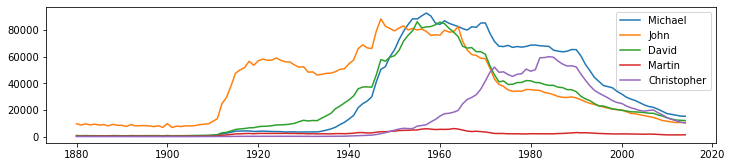

In [37]:
pp.figure(figsize=(12,2.5))

names = ['Michael','John','David','Martin', 'Christopher']

for name in names:
    plotname('M',name)

pp.legend(names)

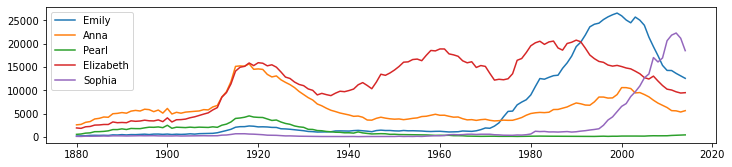

In [55]:
pp.figure(figsize=(12,2.5))

names = ['Emily','Anna','Pearl','Elizabeth', 'Sophia']

for name in names:
    plotname('F',name)

pp.legend(names)

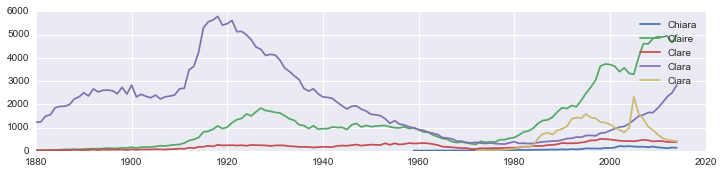

In [19]:
pp.figure(figsize=(12,2.5))

names = ['Chiara','Claire','Clare','Clara','Ciara']

for name in names:
    plotname('F',name)

pp.legend(names)

In [20]:
allyears_indexed.loc['F'].loc[names].head()

number
name   year        
Chiara 1959       9
       1960       5
       1962       8
       1963       8
       1964      12

In [21]:
allyears_indexed.loc['F'].loc[names].unstack(level=0).head()

number                         
name Chiara Ciara Claire Clara Clare
year                                
1880    NaN   NaN     21  1226    15
1881    NaN   NaN     23  1242    20
1882    NaN   NaN     30  1490    21
1883    NaN   NaN     38  1548    22
1884    NaN   NaN     33  1852    38

In [22]:
allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0).head()

number                         
name Chiara Ciara Claire Clara Clare
year                                
1880      0     0     21  1226    15
1881      0     0     23  1242    20
1882      0     0     30  1490    21
1883      0     0     38  1548    22
1884      0     0     33  1852    38

In [23]:
variants = allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0)

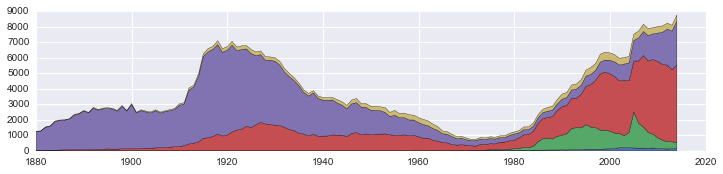

In [24]:
pp.figure(figsize=(12,2.5))

pp.stackplot(variants.index,variants.values.T,label=names)

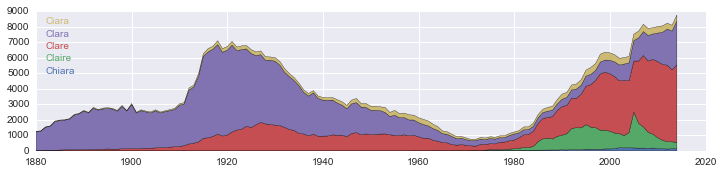

In [25]:
pp.figure(figsize=(12,2.5))

palette = seaborn.color_palette()
pp.stackplot(variants.index,variants.values.T,colors=palette)

for i,name in enumerate(names):
    pp.text(1882,5000 + 800*i,name,color=palette[i])

In [64]:
allyears_indexed.loc['M',:,2014].sort_values('number',ascending=False).head()

number
sex name    year        
M   Noah    2014   19144
    Liam    2014   18342
    Mason   2014   17092
    Jacob   2014   16712
    William 2014   16687

In [70]:
pop2014 = allyears_indexed.loc['M',:,2014].sort_values('number',ascending=False).head(12)

In [72]:
pop2014.reset_index().drop(['sex','year','number'],axis=1).head(12)

,name
0,Noah
1,Liam
2,Mason
3,Jacob
4,William
5,Ethan
6,Michael
7,Alexander
8,James
9,Daniel


In [73]:
def topten(sex,year):
    simple = allyears_indexed.loc[sex,:,year].sort_values('number',ascending=False).reset_index()
    simple = simple.drop(['sex','year','number'],axis=1).head(10)
    
    simple.columns = [year]
    simple.index = simple.index + 1
    
    return simple

In [81]:
topten('M',2009)

,2009
1,Jacob
2,Ethan
3,Michael
4,Alexander
5,William
6,Joshua
7,Daniel
8,Jayden
9,Noah
10,Christopher


In [86]:
def toptens(sex,year0,year1):
    years = [topten(sex,year) for year in range(year0,year1+1)]
    return years[0].join(years[1:])

In [88]:
toptens('F',2000,2014)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
1,Emily,Emily,Emily,Emily,Emily,Emily,Emily,Emily,Emma,Isabella,Isabella,Sophia,Sophia,Sophia,Emma
2,Hannah,Madison,Madison,Emma,Emma,Emma,Emma,Isabella,Isabella,Emma,Sophia,Isabella,Emma,Emma,Olivia
3,Madison,Hannah,Hannah,Madison,Madison,Madison,Madison,Emma,Emily,Olivia,Emma,Emma,Isabella,Olivia,Sophia
4,Ashley,Ashley,Emma,Hannah,Olivia,Abigail,Isabella,Ava,Olivia,Sophia,Olivia,Olivia,Olivia,Isabella,Isabella
5,Sarah,Alexis,Alexis,Olivia,Hannah,Olivia,Ava,Madison,Ava,Ava,Ava,Ava,Ava,Ava,Ava
6,Alexis,Sarah,Ashley,Abigail,Abigail,Isabella,Abigail,Sophia,Madison,Emily,Emily,Emily,Emily,Mia,Mia
7,Samantha,Samantha,Abigail,Alexis,Isabella,Hannah,Olivia,Olivia,Sophia,Madison,Abigail,Abigail,Abigail,Emily,Emily
8,Jessica,Abigail,Sarah,Ashley,Ashley,Samantha,Hannah,Abigail,Abigail,Abigail,Madison,Madison,Mia,Abigail,Abigail
9,Elizabeth,Elizabeth,Samantha,Elizabeth,Samantha,Ava,Sophia,Hannah,Elizabeth,Chloe,Chloe,Mia,Madison,Madison,Madison
10,Taylor,Olivia,Olivia,Samantha,Elizabeth,Ashley,Samantha,Elizabeth,Chloe,Mia,Mia,Chloe,Elizabeth,Elizabeth,Charlotte


In [34]:
toptens('F',1985,1995).stack().head()

1  1985    Jessica
   1986    Jessica
   1987    Jessica
   1988    Jessica
   1989    Jessica
dtype: object

In [35]:
toptens('F',1985,1995).stack().value_counts()

Jessica      11
Elizabeth    11
Amanda       11
Sarah        11
Ashley       11
Brittany     10
Stephanie     9
Samantha      8
Jennifer      7
Emily         5
Nicole        4
Taylor        3
Heather       3
Megan         3
Lauren        2
Hannah        1
dtype: int64

In [36]:
popular = toptens('F',1985,1995).stack().value_counts().index[:6]

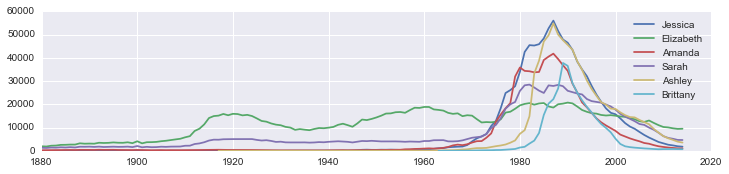

In [37]:
pp.figure(figsize=(12,2.5))

for name in popular:
    plotname('F',name)
    
pp.legend(popular)

In [38]:
allyears.groupby(['sex','name']).sum().head()

number   year
sex name                    
F   Aabha          21   6037
    Aabriella      10   4022
    Aaden           5   2009
    Aadhira        29   6039
    Aadhya        639  16084

In [39]:
allyears.groupby(['sex','name'])['number'].sum().head()

sex  name     
F    Aabha         21
     Aabriella     10
     Aaden          5
     Aadhira       29
     Aadhya       639
Name: number, dtype: int64

In [89]:
totals = allyears.groupby(['sex','name'])['number'].sum()

In [90]:
def sumsq(x):
    return sum(x**2)

In [108]:
spikyness = allyears.groupby(['sex','name'])['number'].agg(sumsq) / totals**2

In [115]:
spikyness.sort_values().head()

sex  name  
F    Louisa    0.007931
     Sina      0.008185
     Alida     0.008215
     Delia     0.008263
M    Ike       0.008310
Name: number, dtype: float64

In [117]:
spiky_common = spikyness.sort_values()[totals > 5000].copy()
spiky_common.head(10)

sex  name   
F    Louisa     0.007931
     Delia      0.008263
M    Ike        0.008310
F    Mollie     0.008437
     Rosa       0.008512
M    Hiram      0.008618
     Will       0.008635
F    Celia      0.008639
     Nina       0.008752
     Minerva    0.008853
Name: number, dtype: float64

In [118]:
spiky_common.tail(5)

sex  name     
F    Harper       0.164827
     Adalynn      0.177107
M    Jase         0.182165
     Shaquille    0.195689
     Iker         0.199368
Name: number, dtype: float64

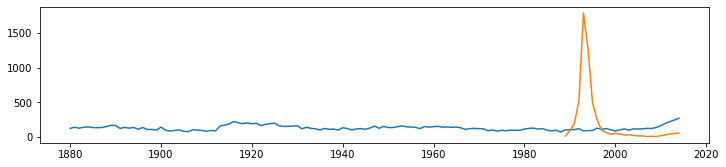

In [119]:
pp.figure(figsize=(12,2.5))

plotname('F','Louisa')
plotname('M','Shaquille')

In [120]:
fads = spiky_common.head(10).index.values

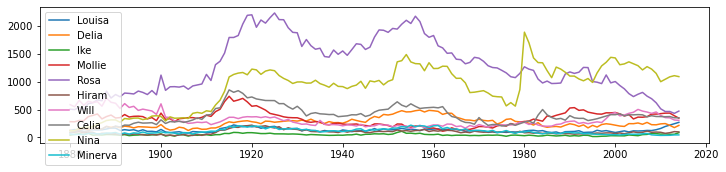

In [121]:
pp.figure(figsize=(12,2.5))

for sex,name in fads:
    plotname(sex,name)

pp.legend([name for sex,name in fads],loc='upper left')

In [122]:
totals_recent = allyears[allyears['year'] > 2005].groupby(['sex','name'])['number'].sum()

In [124]:
spiky_common = spikyness.sort_values()[(totals > 5000) & (totals_recent < 1000)].copy()
spiky_common.head(10)

sex  name    
M    Ike         0.008310
     Hiram       0.008618
F    Minerva     0.008853
M    Lemuel      0.009003
     Williams    0.009036
     Leander     0.009196
F    Rena        0.009261
M    Napoleon    0.009346
     Jess        0.009396
F    Rosalia     0.009405
Name: number, dtype: float64

In [125]:
fads = spiky_common.head(10).index.values

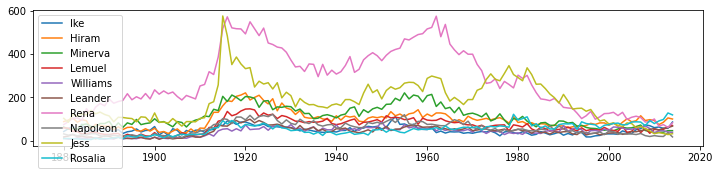

In [126]:
pp.figure(figsize=(12,2.5))

for sex,name in fads:
    plotname(sex,name)

pp.legend([name for sex,name in fads],loc='upper left')

In [127]:
totals = allyears.groupby(['sex','name'])['number'].sum()

In [128]:
totals_bysex = totals.unstack('sex')
totals_bysex.head()

sex,F,M
name,,
Aaban,NaN,72.0
Aabha,21.0,NaN
Aabid,NaN,5.0
Aabriella,10.0,NaN
Aadam,NaN,196.0


In [129]:
totals_both = totals_bysex.sum(axis = 1)

In [130]:
totals_both.head()

name
Aaban         72.0
Aabha         21.0
Aabid          5.0
Aabriella     10.0
Aadam        196.0
dtype: float64

In [131]:
ratio = totals_bysex['F'] / totals_bysex['M']

In [132]:
ratio.head()

name
Aaban       NaN
Aabha       NaN
Aabid       NaN
Aabriella   NaN
Aadam       NaN
dtype: float64

In [133]:
unisex = (ratio > 0.25) & (ratio < 4)

In [141]:
totals_both = totals_both[unisex].sort_values(ascending=False)
totals_both.head(20)

name
Willie     593888.0
Jordan     479434.0
Taylor     416096.0
Leslie     376587.0
Jamie      350262.0
Angel      301425.0
Lee        291691.0
Jessie     274931.0
Marion     259549.0
Dana       243517.0
Lynn       233758.0
Casey      183655.0
Riley      169099.0
Jackie     168485.0
Johnnie    149953.0
Avery      138423.0
Billie     132585.0
Aubrey     116026.0
Jaime      115177.0
Dakota     110053.0
dtype: float64

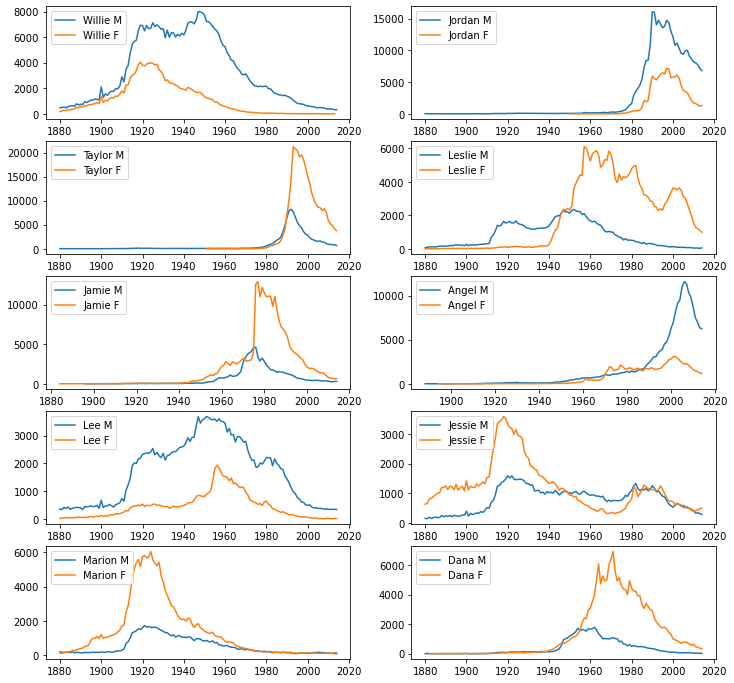

In [140]:
names = totals_both.head(10).index.values

pp.figure(figsize=(12,12))

for i,name in enumerate(names):
    pp.subplot(5,2,i+1)
    
    plotname('M',name)
    plotname('F',name)
    
    pp.legend([name + ' M',name + ' F'],loc='upper left')

In [143]:
type(names)

numpy.ndarray